In [1]:
import json
import sys, re

import requests
import spotipy
import circlify
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

from pprint import pprint
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
def getArtistImage(artist):
    #put in artist name returns url for image
    cid = '230cf876831c41f98414cd63f527ab1e'
    secret = 'c51e114110164f03a228031a53f56c87'
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = sp.search(q=artist, limit=1)['tracks']['items'][0]['album']['artists'][0]['id']
    artistImageUrl = sp.artist(results)['images'][0]['url']
    return artistImageUrl


def makeCircle(artist1,artist2):
    myName = []
    myPop = []
    myArtist = []

    try:
        artist = artist1
        tot_d = {}
        limit = 10
        urlraw = f'http://ws.audioscrobbler.com/2.0/?method=artist.gettopalbums&artist={artist1}&api_key=70894b101e887cf7fd9443bd5067f675&format=json&limit={limit}'

        r = requests.get(urlraw)
        tmp = r.json()
        # pprint(tmp)

        data = {}
        for i in range(limit):
            data[tmp['topalbums']['album'][i]['name']] = tmp['topalbums']['album'][i]['playcount']
        # print(data)

        names = list(data.keys())
        values = list(data.values())

        #plt.show()

        tot_d[artist] = sum(values)
        myDf = pd.Series(data).to_frame()#, orient='index')
        #print(myDf)
        myDf = myDf.sort_values(by=[0], ascending=False)
        for i in range(5):
            newName = myDf.index[i]
            newSong = (myDf[0][i])
            myName.append(newName)
            myPop.append(newSong)
            myArtist.append(artist1)

    except:
        print('your artist1 is WRONG')

    try:
        artist = artist2
        tot_d = {}
        limit = 10
        urlraw = f'http://ws.audioscrobbler.com/2.0/?method=artist.gettopalbums&artist={artist2}&api_key=70894b101e887cf7fd9443bd5067f675&format=json&limit={limit}'

        r = requests.get(urlraw)
        tmp = r.json()
        # pprint(tmp)

        data = {}
        for i in range(limit):
            data[tmp['topalbums']['album'][i]['name']] = tmp['topalbums']['album'][i]['playcount']
        # print(data)

        names = list(data.keys())
        values = list(data.values())

        #plt.show()

        tot_d[artist] = sum(values)
        myDf = pd.Series(data).to_frame()#, orient='index')
        #print(myDf)
        myDf = myDf.sort_values(by=[0], ascending=False)
        for i in range(5):
            newName = myDf.index[i]
            newSong = (myDf[0][i])
            myName.append(newName)
            myPop.append(newSong)
            myArtist.append(artist2)

    except:
        print('your artist2 is WRONG')

#     print(myName)
#     print(myPop)
#     print(myArtist)
    myCircleDf = pd.DataFrame({
    'Name': myName,
    'Value': myPop,
    'Artist' : myArtist})
    return(myCircleDf)


def makeCircleGraph(myCircleDf):
    myCircleDf = myCircleDf.sort_values(by=['Value'], ascending=True)
    #print(myCircleDf)
    #print(myCircleDf['Value'].tolist())
    #print(myCircleDf['Name'].tolist())

    circles = circlify.circlify(
        myCircleDf['Value'].tolist(), 
        show_enclosure=True, 
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )
    circles

    # Create just a figure and only one subplot
    fig, ax = plt.subplots(figsize=(10,10))

    # Title
    ax.set_title(myCircleDf['Artist'][0]+' Vs.'+myCircleDf['Artist'][9])

    # Remove axes
    ax.axis('off')

    # Find axis boundaries
    lim = max(
        max(
            abs(circle.x) + circle.r,
            abs(circle.y) + circle.r,
        )
        for circle in circles
    )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    # list of labels
    labels = myCircleDf['Name']
    art1 = myCircleDf['Artist'][0]
    art2 = myCircleDf['Artist'][9]
    arts = myCircleDf['Artist']

    # print circles
    for circle, label, art in zip(circles, labels, arts):
        if art == art1:
            x, y, r = circle
            ax.add_patch(plt.Circle((x, y), r,facecolor="#e3122e", alpha=0.2, linewidth=2))
            plt.annotate(
                  label, 
                  (x,y ) ,
                  va='center',
                  ha='center')
        else:
            x, y, r = circle
            ax.add_patch(plt.Circle((x, y), r,facecolor="#102ede", alpha=0.2, linewidth=2))
            plt.annotate(
                  label, 
                  (x,y ) ,
                  va='center',
                  ha='center')

In [3]:
def main_circles(artist0, artist1):
    makeCircleGraph(makeCircle(artist0,artist1))

    print(f'See what {artist0} looks like! {getArtistImage(artist0)}')
    print(f'See what {artist1} looks like! {getArtistImage(artist1)}')

In [4]:
"""let user pick any number of artists and respective songs"""
# artist0 = "Giveon" 
# artist1 = "DVSN"
artist0 = 'Drake'
artist1 = 'Coldplay'

# artist0 = input('pick artist? ').title()
# artist1 = input('pick artist? ').title()

See what Drake looks like! https://i.scdn.co/image/ab6761610000e5eb9e46a78c5cd2f7a8e7669980
See what Coldplay looks like! https://i.scdn.co/image/ab6761610000e5eb865a3301762a8fce048cb469


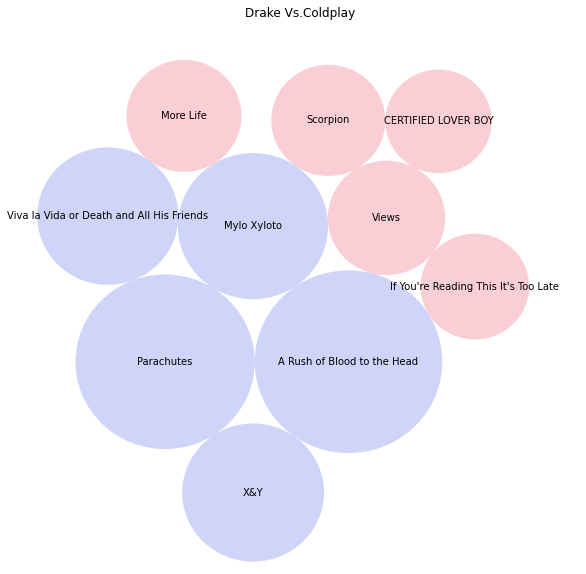

In [5]:
main_circles(artist0, artist1)